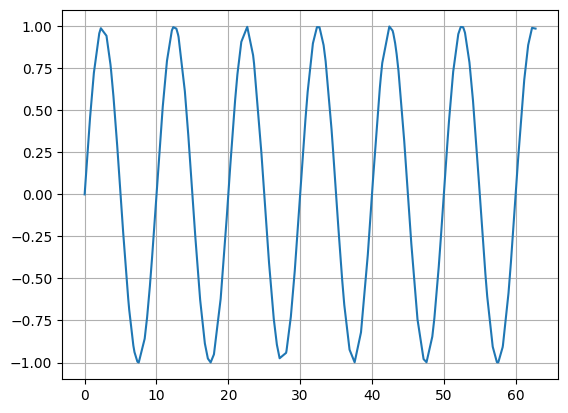

In [29]:
import numpy as np
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

samples = 128

t_k = np.cumsum(np.random.random(samples-1))
t_k = np.insert(t_k, 0, 0)

f_t = 0.1
sine_wave = np.sin(2*np.pi*f_t*t_k)
plt.plot(t_k, sine_wave)
plt.grid(True)

### Interpolacja

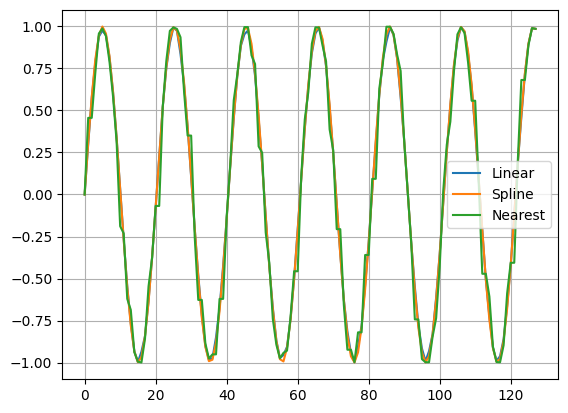

In [54]:
import scipy

linear_interp = np.interp(np.linspace(0, t_k[-1], 128), t_k, sine_wave)
plt.plot(linear_interp)
plt.grid(True)
spline_interp = scipy.interpolate.interp1d(t_k, sine_wave, kind='cubic')
plt.plot(spline_interp(np.linspace(0, t_k[-1], 128)))
plt.grid(True)
nearest_neigh_interp = scipy.interpolate.interp1d(t_k, sine_wave, kind='nearest')
plt.plot(nearest_neigh_interp(np.linspace(0, t_k[-1], 128)))
plt.grid(True)
plt.legend(['Linear', 'Spline', 'Nearest'])

signal = spline_interp(np.linspace(0, t_k[-1], 128))

### Metoda Lomb-Scargla

/tmp/ipykernel_9627/2617766913.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  tau = 1/(4*np.pi*f) * np.arctan((np.sum(np.sin(4*np.pi*f*t)))/(np.sum(np.cos(4*np.pi*f*t))))
/tmp/ipykernel_9627/2617766913.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  tau = 1/(4*np.pi*f) * np.arctan((np.sum(np.sin(4*np.pi*f*t)))/(np.sum(np.cos(4*np.pi*f*t))))


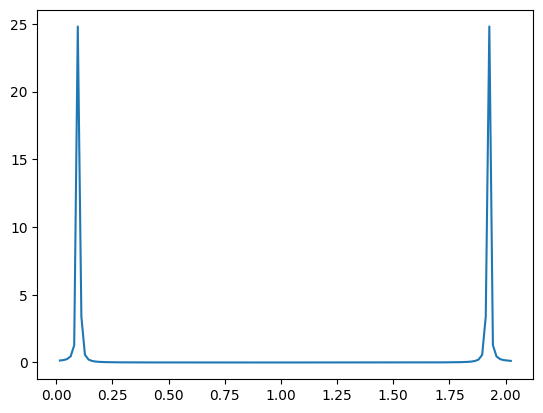

In [79]:
sampling_period = np.linspace(0, t_k[-1], 128)[1] - np.linspace(0, t_k[-1], 128)[0]
sampling_freq = 1/sampling_period
f_v = np.linspace(0, sampling_freq, 128)

def lomb_scargle(signal, f, t):
    tau = 1/(4*np.pi*f) * np.arctan((np.sum(np.sin(4*np.pi*f*t)))/(np.sum(np.cos(4*np.pi*f*t))))
    P = 1/2 * ((np.sum(signal * np.cos(2*np.pi*f*(t-tau))))**2 / np.sum(np.cos(2*np.pi*f*(t-tau))**2) + (np.sum(signal * np.sin(2*np.pi*f*(t-tau))))**2 / np.sum(np.sin(2*np.pi*f*(t-tau))**2))
    return P

P = []
for f in f_v:
    p = lomb_scargle(signal, f, np.linspace(0, t_k[-1], 128))
    P.append(p)
    
plt.plot(f_v, P)

In [80]:
def lomb_scargle_uniform(signal, f, t):
    N = len(t)
    P = 1/N * ((np.sum(signal * np.cos(2*np.pi*f*t)))**2 + (np.sum(signal * np.sin(2*np.pi*f*t)))**2)
    return P

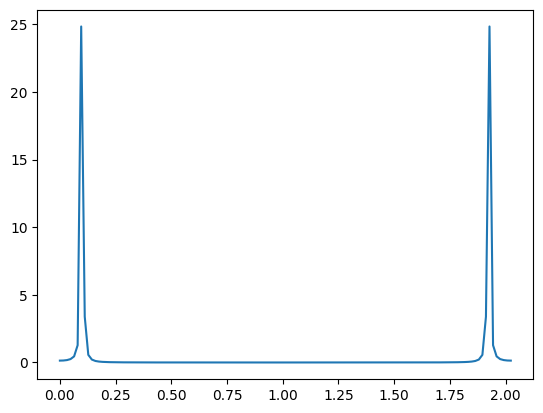

In [81]:

P = []
for f in f_v:
    p = lomb_scargle_uniform(signal, f, np.linspace(0, t_k[-1], 128))
    P.append(p)
    
plt.plot(f_v, P)

### Sygnał rzeczywisty

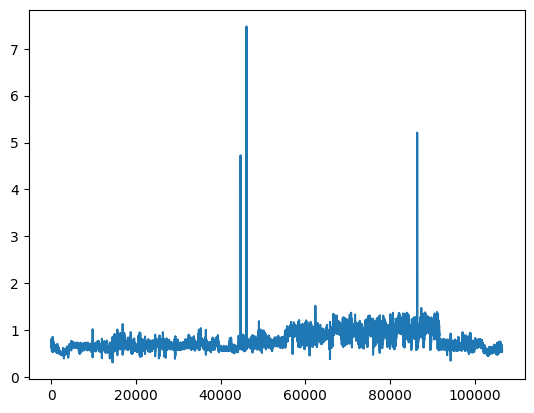

In [95]:
#1. Wczytanie

real_signal = pd.read_csv('nsr001.dat', header=None)
plt.plot(real_signal)

In [99]:
#2. Wyznaczenie czasu próbkowania

t_k = np.cumsum(real_signal)
print(t_k)

                0
0           0.797
1           1.492
2           2.203
3           2.914
4           3.617
...           ...
106455  80964.894
106456  80965.464
106457  80966.058
106458  80966.636
106459  80967.191

[106460 rows x 1 columns]
